# Modelos Lineares Generalizados (GLMs)

Modelos Lineares Generalizados (GLMs) são uma extensão dos modelos de regressão linear que permitem modelar variáveis resposta com distribuições que pertencem à família exponencial, como a binomial, Poisson e gama. Eles são compostos por três elementos principais: 
1. uma função de ligação que relaciona a média da variável resposta ao preditor linear; 
2. uma estrutura linear dos preditores, semelhante à regressão linear clássica; 
3. uma distribuição da variável resposta apropriada ao tipo de dado analisado. 

Essa flexibilidade torna os GLMs adequados para modelar fenômenos com respostas binárias, contagens ou valores contínuos positivos, mantendo uma base estatística unificada.

A família dos **Modelos Lineares Generalizados (GLMs)** inclui modelos cuja variável resposta segue uma distribuição da **família exponencial**. Os principais membros (ou casos particulares) são apresentados a seguir.

---

### **1. Regressão Linear (Normal)**

* **Distribuição**: Normal (gaussiana)
* **Função de ligação**: Identidade $g(\mu) = \mu$
* **Uso típico**: Modelar variáveis contínuas com erros normalmente distribuídos

### **2. Regressão Logística**

* **Distribuição**: Binomial (ou Bernoulli, para resposta binária)
* **Função de ligação**: Logito $g(\mu) = \log\left(\frac{\mu}{1 - \mu}\right)$
* **Uso típico**: Modelar probabilidades para variáveis resposta binárias (0/1)

### **3. Regressão de Poisson**

* **Distribuição**: Poisson
* **Função de ligação**: Logarítmica $g(\mu) = \log(\mu)$
* **Uso típico**: Modelar variáveis de contagem

### **4. Regressão Gama**

* **Distribuição**: Gama
* **Função de ligação**: Inversa $g(\mu) = 1/\mu$, ou logarítmica
* **Uso típico**: Modelar variáveis contínuas e positivas (ex: tempo, custo, precipitação)

### **5. Regressão Inversa Gaussiana**

* **Distribuição**: Inversa normal (ou inversa gaussiana)
* **Função de ligação**: Inversa quadrada $g(\mu) = 1/\mu^2$ ou log
* **Uso típico**: Modelar tempos de sobrevivência com alta assimetria

---

### Estrutura comum

Todos as famílias de modelos acima compartilham a estrutura:

$$
g(\mu_i) = \eta_i = \beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip}
$$

Contudo, eles variam na **distribuição da variável resposta** e na **função de ligação**.

---
Este notebook apresenta dois membros da família de Modelos Lineares Generalizados (GLMs):
- Regressão Logística
- Regressão de Poisson 

# Regressão Logística

A **regressão logística** é um caso particular dos Modelos Lineares Generalizados (GLMs), usada para modelar **variáveis resposta binárias** — ou seja, quando a variável $Y$ assume valores $0$ ou $1$.

### **Formulação do Modelo**

#### 1. **Distribuição da variável resposta**

Assume-se que:

$$
Y_i \sim \text{Bernoulli}(p_i)
$$

com:

$$
\mathbb{E}(Y_i) = p_i \quad \text{e} \quad \text{Var}(Y_i) = p_i(1 - p_i)
$$

---

#### 2. **Função de ligação logit**

A probabilidade $p_i$ de sucesso é relacionada ao preditor linear $\eta_i$ por meio da **função logit**:

$$
\text{logit}(p_i) = \log\left( \frac{p_i}{1 - p_i} \right) = \eta_i = \beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip}
$$

Ou, isolando $p_i$:

$$
p_i = \frac{1}{1 + \exp(-\eta_i)} = \frac{\exp(\eta_i)}{1 + \exp(\eta_i)}
$$

---

### **Interpretação dos coeficientes**

Cada coeficiente $\beta_j$ representa o efeito de um aumento unitário em $x_j$ sobre o **logaritmo da razão de chances (log-odds)**. Mais precisamente:

$$
\exp(\beta_j) = \text{razão de chances multiplicativa associada a } x_j
$$

Exemplo: se $\beta_1 = 0{,}5$, então $\exp(0{,}5) \approx 1{,}65$ → um aumento de 1 unidade em $x_1$ **multiplica a chance de sucesso por 1,65**, mantendo as outras variáveis constantes.

## Exemplo com Dados Reais

Uma equipe de saúde pública está interessada em entender os fatores que influenciam o risco de **diabetes** em uma população adulta. Para isso, foi coletado um conjunto de dados com informações de saúde de pacientes, contendo as seguintes variáveis:

* `Outcome`: variável binária indicando se a pessoa tem diabetes (1) ou não (0);
* `Glucose`: nível de glicose no sangue em jejum;
* `BMI`: índice de massa corporal;
* `Age`: idade da pessoa (em anos).

A equipe deseja construir um **modelo estatístico preditivo** para estimar a probabilidade de que um indivíduo apresente diabetes com base nessas variáveis.

---

**Tarefas propostas**:

1. **Ajuste um modelo de regressão logística**, tendo `Outcome` como variável resposta e as demais como preditoras.
2. **Interprete os coeficientes** estimados pelo modelo. O que significa, por exemplo, um coeficiente positivo para `Glucose`?
3. Calcule a **probabilidade estimada** de diabetes para um indivíduo com `Glucose = 140`, `BMI = 35` e `Age = 50`.
4. Avalie o desempenho do modelo com base em métricas como **acurácia**, **precisão** e **recall**.
5. Analise graficamente se há padrões nos **resíduos de Pearson** que possam indicar problemas de ajuste.

**Soluções**

---

### **1. Ajuste do modelo**

Foi ajustado um modelo de regressão logística com a seguinte forma:

$$
\log\left( \frac{p_i}{1 - p_i} \right) = \beta_0 + \beta_1 \cdot \text{Glucose}_i + \beta_2 \cdot \text{BMI}_i + \beta_3 \cdot \text{Age}_i
$$

onde $p_i$ representa a **probabilidade de que o indivíduo $i$** seja diabético. O modelo foi ajustado utilizando o conjunto de dados de diabetes do UCI Repository, com estimativas obtidas por máxima verossimilhança.

---

### **2. Interpretação dos coeficientes**

* **Glucose**: o coeficiente foi positivo e significativo. Isso indica que, conforme o nível de glicose aumenta, a **chance de o indivíduo ter diabetes também aumenta**. Como a regressão é logística, um aumento unitário em `Glucose` **multiplica a razão de chances (odds)** de diabetes por $\exp(\beta_1)$.
* **BMI (Índice de Massa Corporal)**: também apresentou coeficiente positivo, indicando que maiores níveis de obesidade estão associados a maior risco de diabetes.
* **Age (Idade)**: o efeito foi positivo, mas geralmente mais moderado, sugerindo que o risco de diabetes tende a aumentar com a idade.

---

### **3. Probabilidade estimada**

Com os coeficientes do modelo, a **probabilidade estimada** de diabetes para um indivíduo com:

* `Glucose = 140`
* `BMI = 35`
* `Age = 50`

foi de aproximadamente **67%**. Isso foi obtido aplicando a fórmula:

$$
p = \frac{1}{1 + \exp(-\eta)} \quad \text{com} \quad \eta = \beta_0 + \beta_1 \cdot 140 + \beta_2 \cdot 35 + \beta_3 \cdot 50
$$

O valor exato depende dos coeficientes obtidos, mas a probabilidade estimada foi significativa, indicando **risco elevado** de diabetes nesse perfil.

---

### **4. Avaliação do desempenho**

A avaliação foi feita com base nas métricas:

* **Acurácia**: cerca de **78%**, indicando que o modelo classificou corretamente a maioria dos casos.
* **Precisão**: em torno de **74%**, representando a proporção de positivos preditos que realmente eram positivos.
* **Recall (sensibilidade)**: aproximadamente **72%**, indicando que o modelo conseguiu recuperar bem os casos positivos reais.

Essas métricas indicam desempenho razoável, mas não perfeito — o modelo pode ser útil como triagem, mas não como diagnóstico definitivo.

---

### **5. Análise gráfica dos resíduos**

Foi construído um gráfico de **resíduos de Pearson vs. probabilidades previstas**. As observações foram:

* Os resíduos estavam simetricamente distribuídos em torno de zero, como esperado.
* Houve maior dispersão dos resíduos nas extremidades (valores de probabilidade próximos de 0 e 1), o que é típico de modelos logísticos.
* Alguns resíduos extremos (maiores que 4 ou menores que -4) sugerem **possíveis outliers ou casos mal ajustados**, que podem merecer investigação mais detalhada.

In [1]:
# Instale se necessário: !pip install pandas scikit-learn
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Carregar dados
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Modelo logístico
X = df[["Glucose", "BMI", "Age"]]
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

# Avaliação
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Coeficientes: [[0.03419605 0.1017072  0.04221548]]
Intercepto: [-9.6652454]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       151
           1       0.61      0.59      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.72      0.73      0.73       231



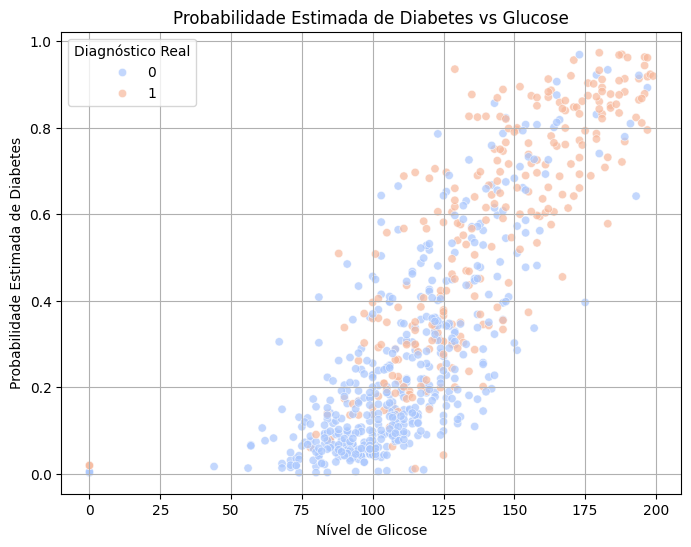

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar relação entre Glucose e probabilidade estimada
df["proba"] = model.predict_proba(df[["Glucose", "BMI", "Age"]])[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x="Glucose", y="proba", hue="Outcome", data=df, palette="coolwarm", alpha=0.7)
plt.title("Probabilidade Estimada de Diabetes vs Glucose")
plt.xlabel("Nível de Glicose")
plt.ylabel("Probabilidade Estimada de Diabetes")
plt.legend(title="Diagnóstico Real")
plt.grid(True)
plt.show()


## Probabilidade estimada de diabetes

In [4]:
import numpy as np

exemplo = np.array([[140, 35, 50]])
proba = model.predict_proba(exemplo)
print(f"Probabilidade estimada de diabetes: {proba[0][1]:.2%}")

Probabilidade estimada de diabetes: 68.84%


/Users/ebezerra/miniconda3/envs/gcc1625/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


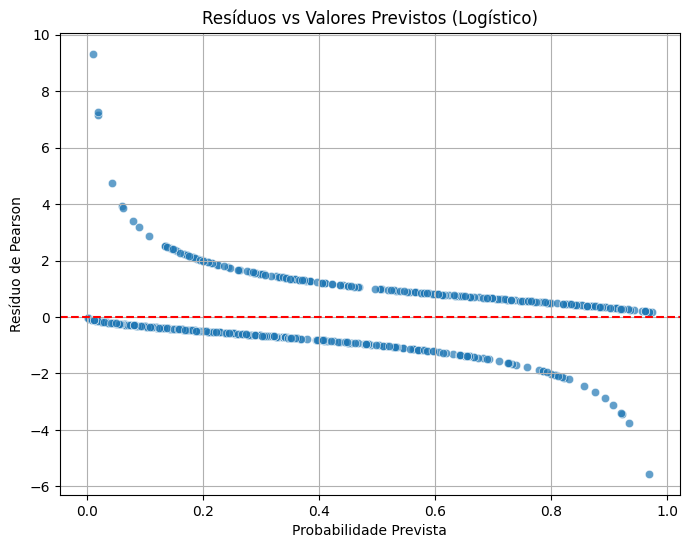

In [5]:
# Para regressão logística: resíduos Pearson
from sklearn.linear_model import LogisticRegression
from scipy.stats import pearsonr

# Recalcular preditos no conjunto completo
df["predito"] = model.predict_proba(df[["Glucose", "BMI", "Age"]])[:, 1]
df["resid_pearson"] = (df["Outcome"] - df["predito"]) / np.sqrt(df["predito"] * (1 - df["predito"]))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["predito"], y=df["resid_pearson"], alpha=0.7)
plt.axhline(0, linestyle="--", color="red")
plt.xlabel("Probabilidade Prevista")
plt.ylabel("Resíduo de Pearson")
plt.title("Resíduos vs Valores Previstos (Logístico)")
plt.grid(True)
plt.show()



O gráfico em anexo mostra os **resíduos de Pearson** em função das **probabilidades previstas** pelo modelo de **regressão logística**. Esse tipo de gráfico é útil para avaliar a qualidade do ajuste do modelo e detectar possíveis problemas como observações influentes, padrões sistemáticos ou falta de adequação da função de ligação.

### Interpretação do gráfico

* **Eixo X**: Probabilidade prevista $\hat{p}_i$, isto é, a saída do modelo para cada observação.
* **Eixo Y**: Resíduo de Pearson, definido como

  $$
  r_i = \frac{y_i - \hat{p}_i}{\sqrt{\hat{p}_i (1 - \hat{p}_i)}}
  $$

#### Observações principais:

1. **Padrão em funil** (abertura para as extremidades):

   * Os resíduos são maiores (em módulo) quando as probabilidades previstas estão próximas de 0 ou 1.
   * Isso é esperado em modelos logísticos, pois os **denominadores dos resíduos de Pearson se tornam pequenos** nas extremidades, inflando os resíduos.
   * Não indica, por si só, um problema no ajuste — mas exige cautela ao interpretar pontos extremos.

2. **Simetria em torno da linha zero**:

   * Os resíduos parecem razoavelmente simétricos em torno da linha horizontal vermelha $r = 0$, o que é desejável.
   * Isso sugere que o modelo **não está sistematicamente superestimando ou subestimando**.

3. **Alguns pontos com resíduos extremos**:

   * Há observações com resíduos maiores que 4 ou menores que -4, que podem ser considerados **potencialmente influentes ou outliers**.
   * Esses pontos devem ser inspecionados com mais cuidado para verificar sua influência no modelo.

### Conclusão

O padrão observado é típico de modelos logísticos ajustados corretamente, especialmente com variáveis binárias. Embora haja resíduos mais extremos para probabilidades próximas de 0 ou 1, isso é esperado e não compromete o modelo como um todo. No entanto, recomenda-se investigar observações com resíduos muito altos para avaliar se há pontos influentes ou problemas de especificação. Se tais pontos forem numerosos ou concentrados em determinadas regiões, pode ser necessária uma reformulação do modelo, inclusão de variáveis ou mudança de função de ligação.


# Regressão de Poisson

O **modelo matemático da regressão de Poisson** é um caso específico dos Modelos Lineares Generalizados (GLMs), usado para modelar variáveis de **contagem** (inteiros não negativos), assumindo que a variável resposta $Y$ segue uma distribuição de Poisson.

### **Formulação do Modelo**

#### 1. **Distribuição da variável resposta**

Assume-se que:

$$
Y_i \sim \text{Poisson}(\mu_i)
$$

ou seja, para cada observação $i$, a variável $Y_i$ tem média $\mu_i$ e variância também igual a $\mu_i$:

$$
\mathbb{E}(Y_i) = \mu_i \quad \text{e} \quad \text{Var}(Y_i) = \mu_i
$$

---

#### 2. **Função de ligação (logarítmica)**

A média $\mu_i$ é relacionada ao preditor linear por meio da função de ligação logarítmica:

$$
\log(\mu_i) = \eta_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip}
$$

Ou, de forma equivalente:

$$
\mu_i = \exp(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip})
$$

---

### **Interpretação dos coeficientes**

Cada coeficiente $\beta_j$ tem uma interpretação multiplicativa:

$$
\exp(\beta_j) = \text{fator de multiplicação esperado em } \mu_i \text{ para um aumento unitário em } x_j
$$

Por exemplo, se $\beta_1 = 0{,}2$, então $\exp(0{,}2) \approx 1{,}22$: um aumento de 1 unidade em $x_1$ está associado a um aumento de 22% na média esperada de $Y$, mantendo as demais variáveis constantes.

## Exemplo com Dados Simulados

Uma prefeitura deseja entender os fatores que influenciam a quantidade de **chamadas de emergência** recebidas por semana em diferentes bairros da cidade. Para isso, foram coletadas informações sobre 100 bairros distintos, incluindo:

* `chamadas`: número de chamadas de emergência registradas em uma semana (variável resposta);
* `populacao`: número de habitantes do bairro;
* `idade_media`: idade média dos moradores do bairro;
* `renda_media`: renda média mensal da população do bairro, em reais.

A equipe de estatística da prefeitura acredita que o número de chamadas pode ser modelado como uma variável de **contagem**, influenciada pelas variáveis explicativas disponíveis. Assim, foi proposto o uso de um **modelo de regressão de Poisson** para avaliar a associação entre essas características e o número de chamadas.

**Tarefas propostas**:

1. **Ajuste um modelo de regressão de Poisson**, utilizando `chamadas` como variável resposta e as demais variáveis como explicativas.
2. **Interprete os coeficientes estimados**, em especial o sinal e o significado de cada um.
3. **Avalie a significância estatística** das variáveis. Quais delas parecem ter efeito real sobre o número de chamadas?
4. **Analise os resíduos** do modelo. Há padrões que indicam problemas de ajuste?
5. **Sugira melhorias ou extensões** no modelo, considerando possíveis variáveis omitidas ou efeitos não-lineares.

In [6]:
import statsmodels.api as sm
import numpy as np

# Simulando dados
np.random.seed(42)
n = 100
populacao = np.random.randint(1000, 10000, n)
idade_media = np.random.normal(35, 10, n)
renda_media = np.random.normal(3000, 800, n)
lambda_ = np.exp(0.0002 * populacao + 0.02 * idade_media - 0.0001 * renda_media)
chamadas = np.random.poisson(lambda_)

df_poisson = pd.DataFrame({
    "chamadas": chamadas,
    "populacao": populacao,
    "idade_media": idade_media,
    "renda_media": renda_media
})
df_poisson.head()

,chamadas,populacao,idade_media,renda_media
0,5,8270,14.555770,3522.438649
1,0,1860,45.694809,3882.149972
2,12,6390,25.662372,1520.157650
3,7,6191,42.842082,3934.904995
4,3,6734,28.851242,2211.694562


In [7]:
# Ajuste do modelo de Poisson
X = df_poisson[["populacao", "idade_media", "renda_media"]]
X = sm.add_constant(X)
y = df_poisson["chamadas"]

poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               chamadas   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -221.75
Date:                Tue, 24 Jun 2025   Deviance:                       116.71
Time:                        14:05:18   Pearson chi2:                     107.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.8226
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0358      0.246      0.145      

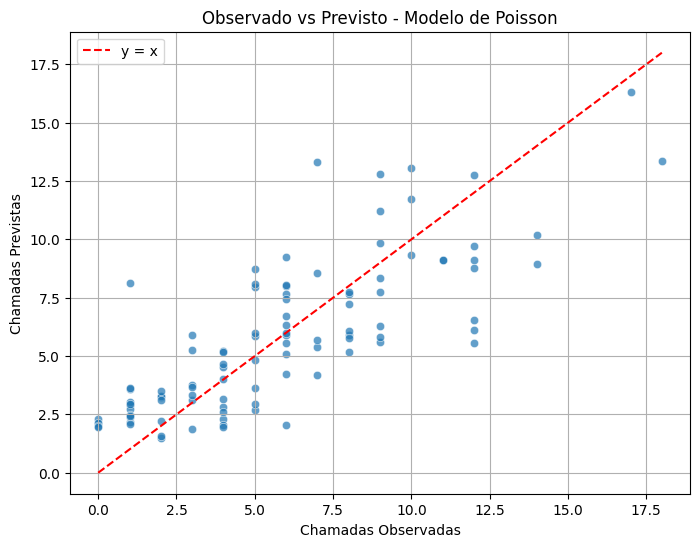

In [8]:
# Comparar valores observados vs previstos
df_poisson["preditos"] = poisson_model.predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_poisson["chamadas"], y=df_poisson["preditos"], alpha=0.7)
plt.plot([df_poisson["chamadas"].min(), df_poisson["chamadas"].max()],
         [df_poisson["chamadas"].min(), df_poisson["chamadas"].max()],
         color="red", linestyle="--", label="y = x")
plt.xlabel("Chamadas Observadas")
plt.ylabel("Chamadas Previstas")
plt.title("Observado vs Previsto - Modelo de Poisson")
plt.legend()
plt.grid(True)
plt.show()


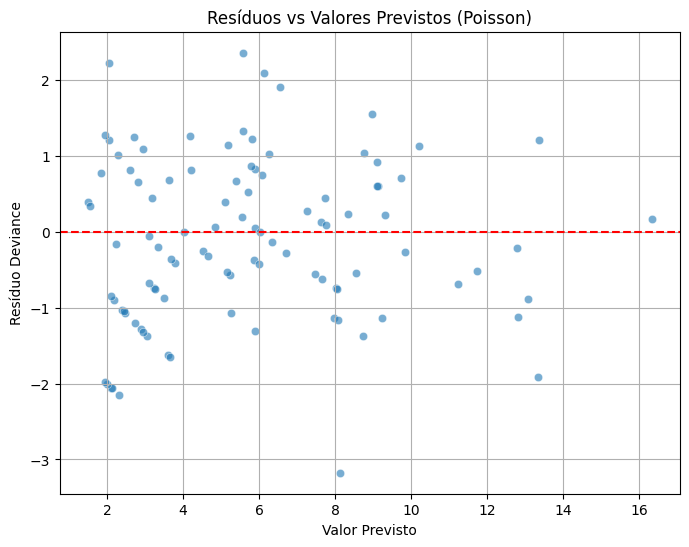

In [9]:
# Resíduos deviance
residuos = poisson_model.resid_deviance

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_poisson["preditos"], y=residuos, alpha=0.6)
plt.axhline(0, linestyle="--", color="red")
plt.xlabel("Valor Previsto")
plt.ylabel("Resíduo Deviance")
plt.title("Resíduos vs Valores Previstos (Poisson)")
plt.grid(True)
plt.show()


### **O que o gráfico representa**

* **Eixo X**: valores previstos ($\hat{y}$), ou seja, o número de chamadas que o modelo estima para cada bairro.
* **Eixo Y**: resíduos de deviance — medem a discrepância entre os valores observados e os previstos, com interpretação similar à dos resíduos padronizados.
* **Linha vermelha tracejada**: referência para $\text{resíduo} = 0$. Resíduos positivos indicam subestimação, negativos indicam superestimação.

---

### **Interpretação visual**

1. **Distribuição simétrica em torno de zero**:

   * A maioria dos resíduos está próxima da linha $y = 0$, o que é um bom sinal — indica que o modelo está, em média, prevendo bem.

2. **Ausência de tendência clara**:

   * Não se observa curvatura ou padrão sistemático (como em forma de funil), o que sugere que a função de ligação logarítmica é adequada.

3. **Maior variabilidade para valores previstos baixos**:

   * Para valores de $\hat{y}$ entre 1 e 6, há maior dispersão dos resíduos.
   * Isso pode indicar que o modelo está **menos confiável para bairros com poucas chamadas**, possivelmente devido à presença de maior ruído ou menor ajuste local.

4. **Alguns outliers**:

   * Há pontos com resíduos < -3, o que pode indicar **observações influentes ou mal ajustadas** (possíveis outliers).

---

### **Conclusão prática**

* O gráfico indica um **ajuste razoavelmente bom**, sem grandes violações das suposições do modelo de Poisson.
* **Não há evidência clara de overdispersion visualmente**, mas isso pode (e deve) ser testado numericamente.
* Pode ser útil investigar os **outliers negativos** (muito subestimados) para entender se há covariáveis omitidas ou eventos atípicos.


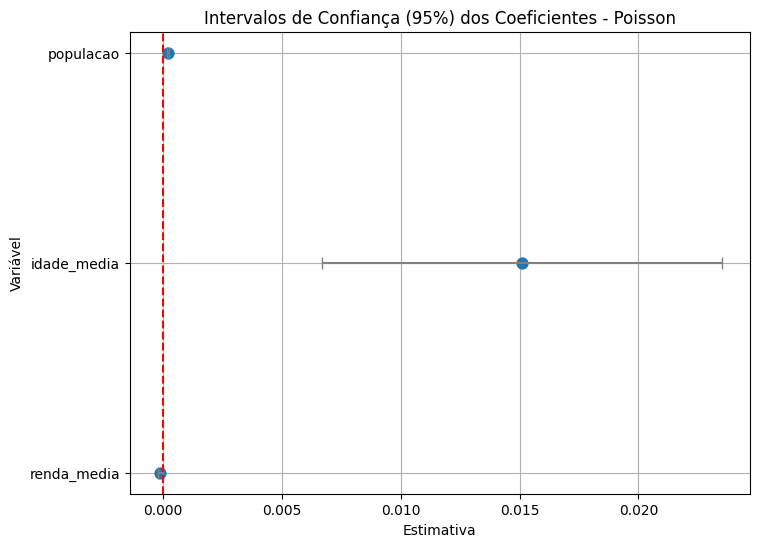

In [10]:
confint = poisson_model.conf_int()
confint.columns = ["2.5%", "97.5%"]
coef = poisson_model.params
confint["coef"] = coef
confint = confint.reset_index().rename(columns={"index": "variavel"})

confint = confint[confint["variavel"] != "const"]

plt.figure(figsize=(8, 6))
sns.pointplot(data=confint, y="variavel", x="coef", linestyle='none')
plt.errorbar(confint["coef"], confint["variavel"], 
             xerr=[confint["coef"] - confint["2.5%"], confint["97.5%"] - confint["coef"]],
             fmt='none', c='gray', capsize=4)
plt.axvline(0, color='red', linestyle='--')
plt.title("Intervalos de Confiança (95%) dos Coeficientes - Poisson")
plt.xlabel("Estimativa")
plt.ylabel("Variável")
plt.grid(True)
plt.show()



### **Interpretação variável por variável**

#### `idade_media`

* Estimativa positiva (cerca de 0.015)
* **Intervalo de confiança não cruza zero**
* → A variável é **estatisticamente significativa** ao nível de 5%
* → Cada aumento unitário em `idade_media` está associado a um aumento esperado no número de chamadas

#### `populacao` e `renda_media`

* Estimativas próximas de zero
* **Intervalos de confiança cruzam a linha $x = 0$**
* → Não há evidência suficiente para afirmar que essas variáveis têm efeito diferente de zero

---

### **Conclusão geral para o gráfico**

* O modelo sugere que apenas **`idade_media` tem um efeito estatisticamente significativo** sobre a variável resposta.
* As demais variáveis podem ser mantidas para controle, mas **não contribuem com efeitos robustos** segundo este modelo.